# Mountain Project Ticks
[Mountain Project](https://www.mountainproject.com/) is a website that serves as a community-built guide for rock climbing areas around the globe. The site allows users to track ("tick") each attempt of a route and record various information related to the attempt and the climber's opinion of the route. Mountain Project allows all of a user's ticks to be exported as CSV and downloaded. In this notebook, we will clean a data set containing the author's Mountain Project [tick list](https://www.mountainproject.com/user/112173761/eric-connelly/ticks) and plot various aspects to better understand the author's current trajectory in climbing as a sport.

## Cleaning
First we will read in the data and perform some initial cleaning. The tick list downloaded from Mountain Project is saved in the same directory as this notebook and named `ticks.csv`. 

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ticks = pd.read_csv("ticks.csv")
ticks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         368 non-null    object 
 1   Route        368 non-null    object 
 2   Rating       368 non-null    object 
 3   Notes        204 non-null    object 
 4   URL          368 non-null    object 
 5   Pitches      368 non-null    int64  
 6   Location     368 non-null    object 
 7   Avg Stars    368 non-null    float64
 8   Your Stars   368 non-null    int64  
 9   Style        368 non-null    object 
 10  Lead Style   322 non-null    object 
 11  Route Type   368 non-null    object 
 12  Your Rating  163 non-null    object 
 13  Length       269 non-null    float64
 14  Rating Code  368 non-null    int64  
dtypes: float64(2), int64(3), object(10)
memory usage: 43.2+ KB


In [2]:
ticks.head()

,Date,Route,Rating,Notes,URL,Pitches,Location,Avg Stars,Your Stars,Style,Lead Style,Route Type,Your Rating,Length,Rating Code
0,2021-01-24,Tennis Shoe Arete,V2,NaN,https://www.mountainproject.com/route/10841295...,1,Illinois > *The Holy Boulders > F: Shadow of a...,2.6,3,Send,NaN,Boulder,V2,NaN,20200
1,2021-01-23,Davenport of a Man,V6+,NaN,https://www.mountainproject.com/route/12022937...,1,Illinois > *The Holy Boulders > F: Shadow of a...,3.0,3,Send,NaN,Boulder,V6+,20.0,20610
2,2021-01-23,Calypso,V6,Day flash,https://www.mountainproject.com/route/11176770...,1,Illinois > *The Holy Boulders > D: Atlas Boulder,3.6,3,Send,NaN,Boulder,V6,10.0,20600
3,2021-01-23,Sukha Sit,V5,NaN,https://www.mountainproject.com/route/11128934...,1,Illinois > *The Holy Boulders > K: Brown Cow Area,3.1,3,Send,NaN,Boulder,NaN,NaN,20500
4,2021-01-23,Weight of the World,V6,NaN,https://www.mountainproject.com/route/11224429...,1,Illinois > *The Holy Boulders > D: Atlas Boulder,3.0,3,Send,NaN,Boulder,NaN,NaN,20600


We will work through each column one by one, but at first glance we appear to be in relatively good shape as far as null values go. Only four of the fourteen columns contain null values. 

First we will address the `Date` column. Pandas read its contents as string values, but it will be easier to work with if we convert to a datetime object. We will also create another column with just the year since that may be useful for the upcoming analysis.

In [3]:
ticks['Date'] = pd.to_datetime(ticks['Date'])
ticks['Year'] = ticks['Date'].dt.year

Next comes the `Route` column. This is just text and does not contain any null values, so all we will do is ensure that the route names don't have any unexpected characters. We use the regex expression `[^ -~]` to target any characters outside of the range of the standard ASCII character set.

In [4]:
ticks[ticks['Route'].str.contains(r'[^ -~]')]

,Date,Route,Rating,Notes,URL,Pitches,Location,Avg Stars,Your Stars,Style,Lead Style,Route Type,Your Rating,Length,Rating Code,Year
20,2020-10-04,Ain’t No Sunshine,5.12c,Second go,https://www.mountainproject.com/route/11534696...,2,Illinois > *Jackson Falls > B. West Falls > C....,2.8,3,Lead,Redpoint,Sport,5.12c,35.0,7200,2020
32,2020-03-01,Rajun’ Cajun,5.12d,Six(ish) attempts. Needed some help with beta.,https://www.mountainproject.com/route/11534690...,6,Illinois > *Jackson Falls > B. West Falls > C....,3.8,4,Lead,Redpoint,Sport,NaN,40.0,7500,2020
176,2018-07-22,Can’t Take the Funk,5.10d,"Cool slab, but I have never seen more lichen o...",https://www.mountainproject.com/route/11436432...,1,Illinois > *Jackson Falls > F. The Promised Land,2.7,3,Lead,Fell/Hung,Sport,NaN,50.0,3500,2018


All three of the routes returned have a unicode typographic apostrophe instead of the ASCII typwriter apostrophe. This will not cause any issues with analysis, so we will leave them.

Next we will want to look at the `Rating` column. (See [this page](https://www.rei.com/learn/expert-advice/climbing-bouldering-rating.html) for an explanation of the rating systems commonly used in the US). Note that "Rating" and "Grade" are used as interchangable terms in this notebook. We will use `Series.value_counts()` method to list every grade in the tick list and the number of times it was recorded.

In [5]:
ticks['Rating'].value_counts()

5.12a         46
5.9           27
5.10b         25
5.12c         23
5.12b         23
5.10a         21
5.11a         20
5.13a         16
5.10c         12
5.12d         12
5.11c         11
5.8            9
5.10d          9
5.11b          9
5.8+           8
V5             8
V4             7
5.11d          5
5.7            5
V6             5
5.6            4
V7             4
V3             4
5.7+           4
V5-6           3
V2-3           3
5.12b/c        3
V1             3
V2             3
5.9+           2
V6+            2
5.11b/c        2
5.8-           2
5.10d PG13     2
V1 R           2
V0             2
V3+            2
5.12a/b        1
5.10-          1
5.10+          1
5.9+ PG13      1
V5 PG13        1
V2 R           1
V0- R          1
V4-5           1
5.11c V3 X     1
5.12b/c V5     1
V0-            1
5.10c/d        1
V1+            1
5.11-          1
5.13c          1
V0-1           1
V0+            1
5.8 PG13       1
5.9-           1
5.10           1
Name: Rating, dtype: int64

We see that there are a few ratings that contain more than one rating, which can happen under circumstances. We are most interested in the primary grade of any route, so we will split any additional rating information into a secondary `Rating_2` column.

In [6]:
ticks[['Rating', 'Rating_2']] = ticks['Rating'].str.split(n=1, expand=True)

The `Notes` column contains any notes that were entered with the tick. It is an optional field on Mountain Project, so it makes sense that there are several null values in the column. We will not being doing any analysis with this column, so we can pass over it. The `URL` column just contains the URL of the Mountain Project page for the climb ticked and likewise does not need any cleaning.

`Pitches` refers to the number of rope lengths needed to climb a particular route. This should be a relatively small integer value. Let us use `Series.value_counts()` to confirm.

In [7]:
ticks['Pitches'].value_counts()

1     310
2      34
3       9
4       5
6       3
5       2
7       2
9       1
10      1
22      1
Name: Pitches, dtype: int64

The values for number of pitches seems reasonable except perhaps the outlier with 22 pitches, but that can be accounted for by a tick for a one [particularly long climb](https://www.mountainproject.com/route/106087605/time-wave-zero). The column is already an integer dtype, so no other cleaning needs to be done here.

Next is the `Location` column. Mountain Project allows locations to be broken down into any number of subareas. The location of most climbs typically has at least three levels in its location hierarchy, so we will split the location into three separate columns, with the `Subarea` column containing all location information after the first two levels of the location hierarchy. Because Mountain Project is primarily US based, the top level division is `State`. Let us take the `value_counts()` of `State` and `Area` to check the values in each.

In [8]:
ticks[['State', 'Area', 'Subarea']] = ticks['Location'].str.split(pat=' > ', n=2, expand=True)
ticks['State'].value_counts()

Illinois         243
Kentucky          44
Colorado          25
Arkansas          21
International     21
California        12
Nevada             2
Name: State, dtype: int64

In [9]:
ticks['Area'].value_counts()

*Jackson Falls               197
*The Holy Boulders            46
Red River Gorge               44
North America                 21
North-Central Arkansas        21
Rifle                         12
Joshua Tree National Park      9
Fort Collins                   9
Yosemite National Park         3
Southern Nevada                2
Estes Park Valley              2
Independence Pass              2
Name: Area, dtype: int64

The first two areas contain an extraneous `*` character for sorting purposes within the Mountain Project listing for Illinois. That is not needed here, so we will remove it.

In [10]:
ticks['Area'] = ticks['Area'].str.replace('*', '', regex=False)

The next couple columns are numerical columns that can take on a range of values, so we will use the `Series.describe()` method to ensure their values fall within a reasonable range. 

Mountian Project users have the option to give any climb a star rating on a zero to four point scale reflecting the quality of the route. The average of all ratings for a climb is recorded in the `Avg Stars` column, while the number of stars given by the user is recorded in `Your Stars`.

In [11]:
ticks['Avg Stars'].describe()

count    368.000000
mean       3.241304
std        0.532211
min        1.600000
25%        2.900000
50%        3.300000
75%        3.700000
max        4.000000
Name: Avg Stars, dtype: float64

In [12]:
ticks['Your Stars'].describe()

count    368.000000
mean       3.364130
std        0.790279
min       -1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Your Stars, dtype: float64

The min and max of the `Avg Stars` column fall within the range of acceptable values for that measurement. The distrubution seems reasonable at a glance despite a tendency to lean towards the upper end of the scale.

`Your Stars` appears to have some problematic values. The minimum of this column is -1 on a scale that should start at 0. Let us look at any values below 1 to investigate.

In [13]:
ticks[ticks['Your Stars'] < 1]

,Date,Route,Rating,Notes,URL,Pitches,Location,Avg Stars,Your Stars,Style,Lead Style,Route Type,Your Rating,Length,Rating Code,Year,Rating_2,State,Area,Subarea
60,2019-09-28,Cocktail Generation,5.12b/c,NaN,https://www.mountainproject.com/route/10794355...,1,Illinois > *Jackson Falls > E. South Canyon > ...,3.0,-1,Lead,Fell/Hung,Sport,NaN,50.0,7100,2019,None,Illinois,Jackson Falls,E. South Canyon > C. Hidden Peaks > C. Cranial...
122,2019-04-13,The Flail,5.12d,Nah,https://www.mountainproject.com/route/10681415...,1,Illinois > *Jackson Falls > B. West Falls > D....,3.3,-1,Lead,Fell/Hung,Sport,NaN,NaN,7500,2019,None,Illinois,Jackson Falls,B. West Falls > D. Battle Axe Tower
272,2018-04-21,Red Corvette,5.13a,NaN,https://www.mountainproject.com/route/10613022...,1,Illinois > *Jackson Falls > A. North Canyon > ...,3.8,-1,Lead,Fell/Hung,Sport,NaN,45.0,8600,2018,None,Illinois,Jackson Falls,A. North Canyon > D. Beaver Wall
351,2017-10-07,Colt 45,5.12b,NaN,https://www.mountainproject.com/route/11042848...,1,Kentucky > Red River Gorge > Pendergrass-Murra...,3.3,-1,Lead,Fell/Hung,Sport,5.12b,75.0,6900,2017,None,Kentucky,Red River Gorge,Pendergrass-Murray Recreational Preserve (PMRP...
352,2017-10-07,Old English,5.10c,NaN,https://www.mountainproject.com/route/10812146...,1,Kentucky > Red River Gorge > Pendergrass-Murra...,3.1,-1,Lead,Onsight,Sport,5.10b,75.0,3200,2017,None,Kentucky,Red River Gorge,Pendergrass-Murray Recreational Preserve (PMRP...


There is not any particular pattern here, but after going to the author's Mountain Project page, we find that these four routes were not given a star rating. The -1 value in this case indicted a missing value. To prevent any issues with calculations, we will replace any instance of -1 with `np.nan`.

In [14]:
ticks['Your Stars'] = ticks['Your Stars'].replace(-1, np.nan)
ticks['Your Stars'].describe()

count    363.000000
mean       3.424242
std        0.605378
min        2.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Your Stars, dtype: float64

These values look more reasonable (although it appears the author's star values suffer from worse inflation than the average!).

`Style` is a categorical variable that tells us in what fashion the climb was done. There should be only a handful of possible values for this column without any null values.

In [15]:
ticks['Style'].value_counts()

Lead       322
Send        22
TR          11
Flash        5
Follow       4
Solo         3
Attempt      1
Name: Style, dtype: int64

The terminology used is quite sport-specific. For this notebook, the most important values will be "Lead" and "Send". To lead a climb is to clip the rope into protection while climbing, as opposed to the climber being belayed with the rope fixed at a point above them. To "send" a climb is to climb it cleanly without falling or otherwise weighting the rope. 

For climbs recorded as "Lead", the `Lead Style` column contains further information on the attempt. As expected from the counts in the `Style` column, `Lead Style` has 322 non-null values. 

In [16]:
ticks['Lead Style'].value_counts()

Redpoint     114
Fell/Hung    113
Onsight       64
Flash         30
Pinkpoint      1
Name: Lead Style, dtype: int64

This column is mostly jargon but does not appear to require any cleaning. For brief context, "Redpoint", "Flash", and "Onsight" are all different styles in which a route can be sent.

`Route Type` lists what type of climb the ticked climb is. The major types that could be present in this tick list are sport, boulder, and trad (short for traditional). Let us take the `value_counts()` of the `Route Type` column to confirm that only those three are present.

In [17]:
ticks['Route Type'].value_counts()

Sport                280
Boulder               56
Trad                  27
Trad, Sport            2
Sport, Boulder         1
Trad, TR, Boulder      1
Sport, TR              1
Name: Route Type, dtype: int64

Most climbs fall into one distinct category, but some have multiple types listed (including TR for top rope). Let us look at each of the multi-category climbs individually to see if we can fit them into a single category.

In [18]:
ticks[ticks['Route Type'].str.contains(',')]

,Date,Route,Rating,Notes,URL,Pitches,Location,Avg Stars,Your Stars,Style,Lead Style,Route Type,Your Rating,Length,Rating Code,Year,Rating_2,State,Area,Subarea
35,2020-02-22,Hydra,5.12b/c,Enjoyable movement and great aesthetics. A hid...,https://www.mountainproject.com/route/10763306...,1,Illinois > *Jackson Falls > C. North Falls > G...,3.2,4.0,Lead,Flash,"Sport, Boulder",5.12b,35.0,7100,2020,V5,Illinois,Jackson Falls,C. North Falls > G. Main Pool
104,2019-05-05,King's Jester,5.10d,A little bit of a different flavor than the re...,https://www.mountainproject.com/route/10696481...,1,Illinois > *Jackson Falls > B. West Falls > A....,2.9,3.0,Lead,Onsight,"Trad, Sport",NaN,NaN,3500,2019,PG13,Illinois,Jackson Falls,B. West Falls > A. The Gallery
249,2018-05-05,Big Wall Greg's Chicken Shack,5.6,NaN,https://www.mountainproject.com/route/10601747...,1,Illinois > *Jackson Falls > A. North Canyon > ...,2.8,3.0,Lead,Redpoint,"Sport, TR",5.6,NaN,1600,2018,None,Illinois,Jackson Falls,A. North Canyon > A. Mr. Jimmy
290,2018-01-12,Dead Man Walking,5.9,Confirmed I don't super like crack climbing.,https://www.mountainproject.com/route/10608547...,1,International > North America > Mexico > Nuevo...,3.5,2.0,Lead,Onsight,"Trad, Sport",NaN,135.0,2400,2018,None,International,North America,Mexico > Nuevo Leon > El Potrero Chico > The D...
341,2017-11-04,Now I'm Nothing,5.11c,NaN,https://www.mountainproject.com/route/10586802...,1,Kentucky > Red River Gorge > Northern Gorge > ...,3.1,3.0,TR,NaN,"Trad, TR, Boulder",5.11c V3 PG13,20.0,5200,2017,V3 X,Kentucky,Red River Gorge,Northern Gorge > Long Wall


Based on the author's personal experience, the first four climbs returned should be categorized as sport. The style in which the author climbed the last climb returned fits best in the trad category. We will manually categorize these climbs as such.

In [19]:
ticks.loc[[35, 104, 249, 290], 'Route Type'] = 'Sport'
ticks.loc[341, 'Route Type'] = 'Trad'

The `Your Rating` column contains values similar to the `Rating` column but is a rating given by a climber when a climb is ticked. Rating a climb is optional, so it makes sense for the column to contain null values.

In [20]:
ticks['Your Rating'].value_counts()

5.12a            19
5.9              14
5.8              13
5.10a            13
5.10b            12
5.11a            11
5.12c            11
5.12b             9
5.10c             9
5.13a             7
V2                6
5.11c             6
V5                5
5.10d             4
5.11b             3
5.7               2
5.11d             2
V6                2
V0 R              2
5.6               2
V3                2
V0                1
5.8+              1
V6+               1
V4                1
5.11c V3 PG13     1
5.13c             1
5.13a PG13        1
V7                1
5.9 R             1
Name: Your Rating, dtype: int64

Similar to the `Rating` column, `Your Rating` contains some values with multiple grades. We will split `Your Rating` into two columns as well.

In [21]:
ticks[['Your Rating', 'Your Rating_2']] = ticks['Your Rating'].str.split(n=1, expand=True)

`Length` is the last column with null values. It lists the total length of a given climb in feet, but length is not always included in the description of a climb. It can take an arbitrary positive number, so the `float64` type is appropriate. Let us use the `describe()` method to confirm the column contains a reasonable distribution.

In [22]:
ticks['Length'].describe()

count     269.000000
mean       81.137546
std       169.779092
min         5.000000
25%        40.000000
50%        55.000000
75%        70.000000
max      2300.000000
Name: Length, dtype: float64

The minimum is acceptable considering how short some boulder problems are, and the interquartile ranges are appropriate given that the author has done mostly single pitch sport climbing. The standard deviation and maximum indicate that there may be some outliers. Let us look at every climb longer than 500 feet to comfirm their lengths are correct.

In [23]:
ticks[ticks['Length'] > 500]

,Date,Route,Rating,Notes,URL,Pitches,Location,Avg Stars,Your Stars,Style,...,Route Type,Your Rating,Length,Rating Code,Year,Rating_2,State,Area,Subarea,Your Rating_2
203,2018-05-26,Crimson Chrysalis,5.8+,"Led pitches 1, 4, and 7. An easy romp. Got rop...",https://www.mountainproject.com/route/10573228...,9,Nevada > Southern Nevada > Red Rock > 11-Junip...,3.6,4.0,Lead,...,Trad,NaN,1000.0,2200,2018,None,Nevada,Southern Nevada,Red Rock > 11-Juniper Canyon > Cloud Tower,NaN
204,2018-05-25,Levitation 29,5.11b/c,"Led pitches 2, 5, 7, 8+9. Aided through crux o...",https://www.mountainproject.com/route/10573244...,10,Nevada > Southern Nevada > Red Rock > 12-Oak C...,3.8,4.0,Lead,...,Trad,NaN,700.0,5100,2018,None,Nevada,Southern Nevada,Red Rock > 12-Oak Creek Canyon > Eagle Wall,NaN
216,2018-05-18,Selaginella,5.8,Led pitches 2 and 4. Almost got off route by t...,https://www.mountainproject.com/route/10609704...,4,California > Yosemite National Park > Yosemite...,3.1,4.0,Lead,...,Trad,NaN,560.0,2100,2018,None,California,Yosemite National Park,Yosemite Valley > Valley North Side > E. Yosem...,NaN
304,2018-01-08,Time Wave Zero,5.12a,Led pitches... Uhh... A lot,https://www.mountainproject.com/route/10608760...,22,International > North America > Mexico > Nuevo...,3.8,3.0,Lead,...,Sport,NaN,2300.0,6600,2018,None,International,North America,Mexico > Nuevo Leon > El Potrero Chico > Timew...,NaN
305,2018-01-06,El Sendero Diablo (The Devil's Path),5.11c,"Led pitches 2, 4, and 5. Amazing, varied climb...",https://www.mountainproject.com/route/10617580...,6,International > North America > Mexico > Nuevo...,3.8,4.0,Lead,...,Sport,5.11c,600.0,5200,2018,None,International,North America,Mexico > Nuevo Leon > El Potrero Chico > The O...,None
307,2018-01-04,Treasure of the Sierra Madre,5.10c,NaN,https://www.mountainproject.com/route/10594950...,7,International > North America > Mexico > Nuevo...,3.5,3.0,Lead,...,Sport,5.10c,700.0,3200,2018,None,International,North America,Mexico > Nuevo Leon > El Potrero Chico > Mota ...,None


The climbs returned are all long multi-pitch routes, so the lengths reported can be reasonably assumed to be correct.

The final column is the `Rating Code` column. It appears that this encodes the `Rating` column numerically. This is not as human readable as the `Rating` column, and there is no reference for the encoding, so this column does not appear to be particularly useful.

In [24]:
ticks['Rating Code'].value_counts().head()

6600    46
2400    27
2900    25
6900    23
7200    23
Name: Rating Code, dtype: int64

## Analysis

Now that the tick list has been cleaned and normalized, we can start using it to answer questions. 

When cleaning we noted that there were three primary climbing disciplines listed: sport, trad, and boulder. Becuase these disciplines are very different styles of climbing and use different grading systems, it makes more sense to make comparisons only within each discipline. Let us plot the breakdown of route types to verify there are enough data points in each discipline.

Text(0, 0.5, 'Number of Ticks')

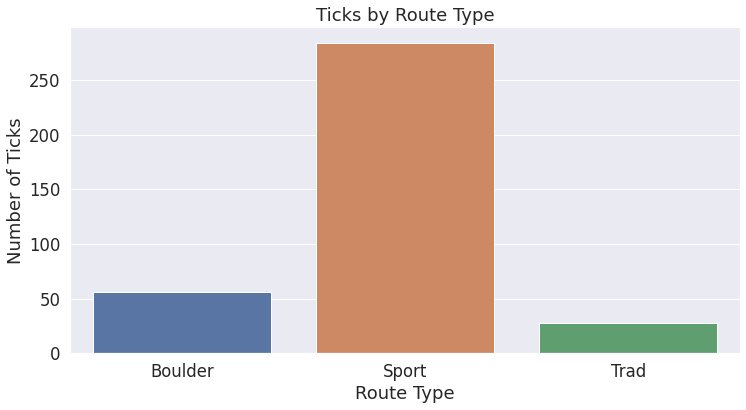

In [25]:
# Set seaborn styling
sns.set_theme(style='darkgrid')
sns.set_context('notebook', font_scale=1.5)

# Create figure and axis objects
fig, ax = plt.subplots(figsize=(12,6))

# Plot data
sns.countplot(x="Route Type", data=ticks)

# Add/format text
plt.title("Ticks by Route Type")
plt.ylabel("Number of Ticks")

Sport climbing is by far the most represented in this tick list. As such, most of the subsequent analysis will be done only on ticks for sport climbs. Let up split our data frame into three data frames--one for each discipline.

In [26]:
sport_ticks = ticks[ticks['Route Type'] == 'Sport'].copy()
boulder_ticks = ticks[ticks['Route Type'] == 'Boulder'].copy()
trad_ticks = ticks[ticks['Route Type'] == 'Trad'].copy()

With the sport climbs isolated, an obvious place to start is plotting the distrubution of grades. Let us preview the distribution using the `value_counts()` method.

In [27]:
sport_ticks['Rating'].value_counts()

5.12a      45
5.10b      25
5.9        24
5.12b      23
5.12c      23
5.11a      20
5.10a      20
5.13a      16
5.12d      12
5.11c      11
5.10d      10
5.10c      10
5.11b       9
5.8         7
5.8+        5
5.11d       5
5.12b/c     4
5.7         2
5.6         2
5.7+        2
5.10c/d     1
5.11-       1
5.13c       1
5.8-        1
5.9+        1
5.12a/b     1
5.11b/c     1
5.10+       1
5.10-       1
Name: Rating, dtype: int64

There is some inconsistency in the rating system, so it is not ready to be plotted right away. Grades 5.10 and above are typically broken into letter grades from a (easiest) to d (hardest), but sometimes a + or - will be used instead. Let us convert any +s and -s for grades 5.10 and above to d and a, respectively. We will also strip the + and - from grades below 5.10 and round "slash" grades (such as b/c) down to the lower grade.

In [28]:
sport_ticks['Rating'] = (sport_ticks['Rating']
                         .str.replace(r'10-', '10a', regex=False)
                         .str.replace(r'10+', '10d', regex=False)
                         .str.replace(r'11-', '11a', regex=False)
                        )
sport_ticks['Rating'] = sport_ticks['Rating'].str.replace(r'(\/[a-d])|[+\-]', '', regex=True)
sport_ticks['Rating'].value_counts()

5.12a    46
5.12b    27
5.10b    25
5.9      25
5.12c    23
5.10a    21
5.11a    21
5.13a    16
5.8      13
5.12d    12
5.11c    11
5.10c    11
5.10d    11
5.11b    10
5.11d     5
5.7       4
5.6       2
5.13c     1
Name: Rating, dtype: int64

The `Rating` column is finally clean enough to be plotted. Let us also create a `Short Rating` column that removes the a-d subdivision to reduce the granularity of the ratings.

In [29]:
sport_ticks['Short Rating'] = sport_ticks['Rating'].str[:4]
sport_ticks['Short Rating'].value_counts()

5.12    108
5.10     68
5.11     47
5.9      25
5.13     17
5.8      13
5.7       4
5.6       2
Name: Short Rating, dtype: int64

There is not a clean way to sort the uncapped decimal system presented here, so we will manualy specify the order of grades by increasing difficulty.

In [30]:
grade_order = ['5.6', '5.7', '5.8', '5.9', '5.10', '5.11', '5.12', '5.13']

With these pieces in place, we can plot the number of ticks by sport grade to determine which grades the author most frequently attempts.

Text(0, 0.5, 'Number of Ticks')

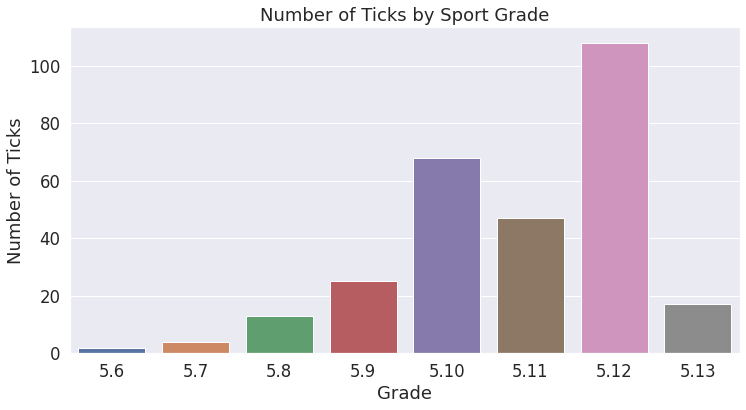

In [31]:
# Create figure and axis objects
fig, ax = plt.subplots(figsize=(12,6))

# Set seaborn styling
sns.set_theme(style='darkgrid')
sns.set_context('notebook', font_scale=1.5)

# Plot data
sns.countplot(x="Short Rating", data=sport_ticks, order=grade_order)

# Add/format text
plt.title("Number of Ticks by Sport Grade")
plt.xlabel("Grade")
plt.ylabel("Number of Ticks")

There are over 100 ticks for 5.12 climbs, followed by around 70 ticks for 5.10 climbs. It is interesting that there is a dip in the distribution in the 5.11 range. This can in part be explained by the fact that there are fewer 5.11 rated climbs in the areas the author frequents than 5.12 climbs. There is a sharp dropoff at the 5.13 grade.

One appealing aspect of sport climbing is trying to send (climb without falling) progressively more difficult routes. "Redpoint", "Onsight", and "Flash" are all styles in which a route can be sent. We will isolate sport routes at grades 5.12a and above that have been sent in this tick list. We also want to drop any duplicates in that list so we do not count any repeat ascents.

In [32]:
# Omit 5.13b because it is not in the 'Ratings' series anyways
hard_grades = ['5.12a', '5.12b', '5.12c', '5.12d', '5.13a', '5.13b', '5.13c']
sent_styles = ['Redpoint', 'Onsight', 'Flash']
hard_sends = sport_ticks[sport_ticks['Rating'].isin(hard_grades) & 
                         sport_ticks['Lead Style'].isin(sent_styles)]
hard_sends = hard_sends.drop_duplicates(subset='Route', keep='last')

hard_sends['Rating'].value_counts().sort_index()

5.12a    18
5.12b    10
5.12c     7
5.12d     3
5.13a     3
5.13c     1
Name: Rating, dtype: int64

We now have list of all sends at or above 5.12a. Note that 5.13b is missing because there are no ticks for climbs rated 5.13b. Let us plot the results.

([<matplotlib.axis.YTick at 0x7f5f28a9d550>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

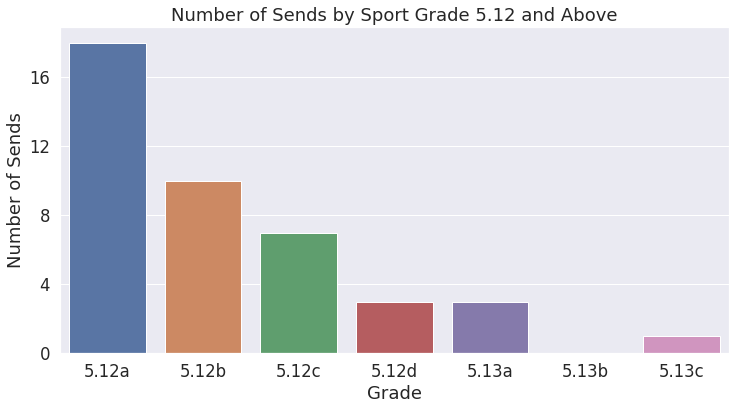

In [33]:
# Create figure and axis objects
fig, ax = plt.subplots(figsize=(12,6))

# Plot data
sns.countplot(x="Rating", data=hard_sends, order=hard_grades)

# Add/format text
plt.title("Number of Sends by Sport Grade 5.12 and Above")
plt.xlabel("Grade")
plt.ylabel("Number of Sends")
plt.yticks(np.arange(0,20,4))

As expected, there are progressively fewer sends ticked as the climbs increase in difficulty. This is consistent with the common recommendation of building a "pyramid" of increasingly difficult routes when trying to improve one's maximum grade climbed. Further improvements for the author should be preceded by increasing the number of sends in the 5.12d to 5.13b range.

We can also measure progress by tracking sends at these higher grades over time. Let us use a pivot table to break down sends by both grade and year.

In [34]:
# Create pivot table 
send_table = pd.pivot_table(hard_sends, values='Route', index='Year', 
                            columns='Rating', aggfunc=len, fill_value=0)

# Add missing 5.13b grade back in
send_table.insert(5, '5.13b', 0)
send_table

Rating,5.12a,5.12b,5.12c,5.12d,5.13a,5.13b,5.13c
Year,,,,,,,
2017,1,0,0,0,0,0,0
2018,4,0,1,0,1,0,0
2019,9,4,3,0,2,0,0
2020,4,6,3,3,0,0,1


With the pivot table created, we can plot the data as a stacked bar chart to visualize the change in performance over time.

([<matplotlib.axis.YTick at 0x7f5f28984370>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

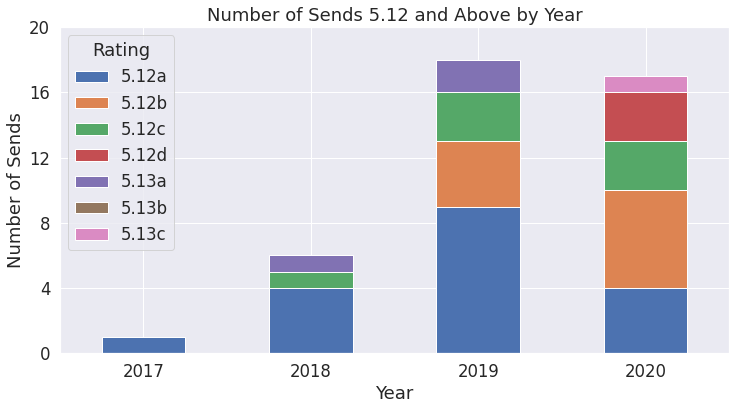

In [35]:
# Plot data
send_table.plot.bar(stacked=True, figsize=(12,6), rot=0)

# Add/format text
plt.title("Number of Sends 5.12 and Above by Year")
plt.xlabel("Year")
plt.ylabel("Number of Sends")
plt.yticks(np.arange(0,24,4))

This chart contains promising information, as it indicates progressive improvement year to year. The total number of climbs sent in 2020 did decrease slightly compared to 2019, but the overall quality of sends improved. Considering restricted travel capabilities for most of 2020, this is a satisfactory result. Overall, the "base" of the pyramid appears to be moving up each year. 

Now we will look at a slightly different metric. To "onsight" a climb is to send it on the first attempt without having any prior information about it. This can be particularly challenging, as the climber usually has to figure out what they are doing on the fly. A climber's ability to onsight is a measure of their ability to read routes and perform consistently at a certain level. Let us compare the number of routes onsighted to the total number of routes attempted per grade. Note that we are using `keep='last'` in the `drop_duplicates()` method because the data is sorted in reverse chronological order. This allows us to keep only the first attempt for any given route.

In [36]:
# Drop duplicates and add indicator columns for onsight and total
sport_first_attempt = sport_ticks.drop_duplicates(subset='Route', keep='last').copy()
sport_first_attempt['Onsight'] = sport_first_attempt['Lead Style'] == 'Onsight'
sport_first_attempt['Total'] = 1

# Group by grade, sum over indicator columns, and use .loc to order by ascending grade
onsight_proportion = (sport_first_attempt[['Short Rating', 'Onsight', 'Total']]
                      .groupby('Short Rating')
                      .sum()
                      .loc[grade_order])
onsight_proportion['Onsight Percent'] = 100 * onsight_proportion['Onsight'] / onsight_proportion['Total']
onsight_proportion

,Onsight,Total,Onsight Percent
Short Rating,,,
5.6,0,2,0.000000
5.7,1,4,25.000000
5.8,4,9,44.444444
5.9,9,19,47.368421
5.10,26,53,49.056604
5.11,9,40,22.500000
5.12,1,71,1.408451
5.13,0,10,0.000000


With our new data frame created we can now plot the proportion of climbs at each grade that were onsighted.

Text(0, 0.5, 'Percentage Onsighted')

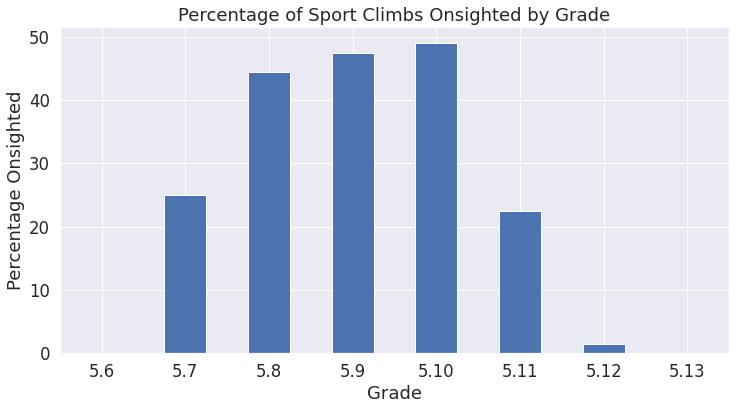

In [37]:
# Plot data
onsight_proportion['Onsight Percent'].plot.bar(figsize=(12,6), rot=0)

# Add/format text
plt.title("Percentage of Sport Climbs Onsighted by Grade")
plt.xlabel("Grade")
plt.ylabel("Percentage Onsighted")

Interestingly, the proportion of climbs at the 5.6 and 5.7 grades that were climbed onsight is much lower than the middle grades, and the proportion of climbs onsighted actually increases up through 5.10. This can likely be attributed to the small sample sizes at lower grades and a tendency to attempt harder climbs as skill improved over time. With the sharp dropoff at 5.11 and beyond, there is certianly room for improvement in onsighting climbs. An appropriate goal for 2021 would be to increase the proportion of 5.11 and 5.12 climbs onsighted.